In [2]:
import numpy as np
np.random.seed(47)

# Parameters
num_independent_groups = 20
num_correlated_groups = 2
samples_per_group = 30
dim = 4

# Helper function to generate independent 4D Gaussian
def generate_independent_group(n_samples):
    mean = [0, 0, 0, 0]
    cov = np.eye(dim)
    return np.random.multivariate_normal(mean, cov, size=n_samples)

# Helper function to generate a group with x and y correlated
def generate_xy_perfectly_correlated_group(n_samples, sign=1):
    # Generate data for the first dimension
    x = np.random.normal(0, 1, n_samples)
    # Make the second dimension perfectly correlated
    y = sign * x + np.random.normal(0, 0.01, n_samples) # Add tiny noise to keep cov slightly non-singular
    # Generate independent data for other dimensions
    z = np.random.normal(0, 1, (n_samples, dim - 2))
    group_data = np.column_stack((x, y, z))
    return group_data
# Generate groups
independent_groups = [generate_independent_group(samples_per_group) for _ in range(num_independent_groups)]
correlated_groups = [generate_xy_perfectly_correlated_group(samples_per_group) for _ in range(num_correlated_groups)]

# Stack data
inlier_data = np.vstack(independent_groups)
outlier_data = np.vstack(correlated_groups)

# Compute covariance matrices
inlier_cov = np.cov(inlier_data, rowvar=False)
outlier_cov = np.cov(outlier_data, rowvar=False)

# Print results
print("Aggregated Covariance Matrix (Inliers - Independent Groups):")
print(inlier_cov)

print("\nAggregated Covariance Matrix (Outliers - Correlated Groups):")
print(outlier_cov)

datasets = independent_groups + correlated_groups

# Optional: check structure
print(f"Total number of groups: {len(datasets)}")
print(f"Shape of first group: {datasets[0].shape}")  # Should be (100, 4)


Aggregated Covariance Matrix (Inliers - Independent Groups):
[[ 0.96135926 -0.01951045 -0.0435744   0.04248384]
 [-0.01951045  0.93162142  0.0198465  -0.03290007]
 [-0.0435744   0.0198465   1.00817172  0.02325173]
 [ 0.04248384 -0.03290007  0.02325173  1.05812133]]

Aggregated Covariance Matrix (Outliers - Correlated Groups):
[[ 1.17959184  1.17896279 -0.02129516 -0.0120209 ]
 [ 1.17896279  1.17843933 -0.01942032 -0.01159762]
 [-0.02129516 -0.01942032  0.82196176  0.05438817]
 [-0.0120209  -0.01159762  0.05438817  0.94821748]]
Total number of groups: 22
Shape of first group: (30, 4)


In [3]:
# import numpy as np

# np.random.seed(47)

# # Parameters
# num_independent_groups = 20  # Number of independent groups
# num_correlated_groups = 2    # Number of correlated groups
# samples_per_group = 30       # Number of samples per group
# dim = 4                      # Number of features, keeping 4 as specified (2D + 2 features set to 0)

# # Helper function to generate independent 2D Gaussian with identity covariance
# def generate_independent_group(n_samples):
#     mean = [0, 0]  # 2D Gaussian
#     cov = np.eye(2)  # Identity covariance (no correlation)
#     group_data_2d = np.random.multivariate_normal(mean, cov, size=n_samples)
#     # Add two zero columns for the other features
#     return np.hstack([group_data_2d, np.zeros((n_samples, dim - 2))])

# # Helper function to generate correlated 2D Gaussian with high covariance
# def generate_correlated_group(n_samples):
#     mean = [0, 0]  # 2D Gaussian
#     cov = np.array([[1, 0.95], [0.95, 1]])  # High correlation (0.95)
#     group_data_2d = np.random.multivariate_normal(mean, cov, size=n_samples)
#     # Add two zero columns for the other features
#     return np.hstack([group_data_2d, np.zeros((n_samples, dim - 2))])

# # Generate groups
# independent_groups = [generate_independent_group(samples_per_group) for _ in range(num_independent_groups)]
# correlated_groups = [generate_correlated_group(samples_per_group) for _ in range(num_correlated_groups)]

# # Stack data
# inlier_data = np.vstack(independent_groups)
# outlier_data = np.vstack(correlated_groups)

# # Compute covariance matrices
# inlier_cov = np.cov(inlier_data, rowvar=False)
# outlier_cov = np.cov(outlier_data, rowvar=False)

# # Print results
# print("Aggregated Covariance Matrix (Inliers - Independent Groups):")
# print(inlier_cov)

# print("\nAggregated Covariance Matrix (Outliers - Correlated Groups):")
# print(outlier_cov)

# datasets = independent_groups + correlated_groups

# # Optional: check structure
# print(f"Total number of groups: {len(datasets)}")
# print(f"Shape of first group: {datasets[0].shape}")  # Should be (15, 4) since dim=4


In [4]:
datasets

[array([[-0.84800948,  1.30590636,  0.92420797,  0.6404118 ],
        [-1.05473698,  1.79776072, -1.01278675,  0.82362332],
        [-0.29465035, -0.59247057, -1.39372706,  1.10417967],
        [-0.93234029, -0.94315644,  0.43660623,  0.79495827],
        [ 0.71953315,  0.08766226, -1.32274841,  0.05179398],
        [-1.83479526,  0.32749647,  0.47623723,  0.16842865],
        [-0.86241133,  0.9074445 ,  0.42288937, -2.21242895],
        [-1.65420574,  0.32137526, -0.46267435, -1.08075021],
        [-0.31377414, -1.01785189,  0.4994227 , -0.02994624],
        [ 0.0470901 , -1.17085876, -1.91252729,  0.27154222],
        [ 0.3220653 , -1.13100016,  0.15786114, -0.92039756],
        [-0.74590988, -0.20421309,  1.96638482,  0.82334611],
        [-1.05748398,  0.55104937,  0.27412325,  0.36729646],
        [ 0.19588933, -0.11352871, -2.08892706, -0.93946455],
        [ 0.27584738,  0.42760686,  0.41674633,  0.30175391],
        [-1.91666376, -0.18007256,  1.26964413, -2.57568271],
        

In [9]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
classifier = OneClassSMMClassifier(nu=0.24)  # 0.3
classifier.fit(datasets[:20])

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [10]:
classifier.gamma

np.float64(0.2999197526786298)

In [11]:
decision = classifier.predict(datasets)

Calculating kappa.

calculating rho.

0.860445434186117


In [12]:
decision

(array([ 0.00580895,  0.00282962,  0.01106951,  0.02616176,  0.00282961,
         0.0289483 ,  0.01244163,  0.02075999,  0.01309887,  0.02782845,
         0.00282961, -0.01980145,  0.01535062,  0.01037089,  0.00657432,
         0.00282961,  0.00282397,  0.01531059,  0.0028294 ,  0.00282962,
        -0.01893048, -0.02057048]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.]))

In [13]:
y_pred = np.sign(decision)

In [14]:
y_pred

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.]])

In [15]:
outlier_indices = [i for i, value in enumerate(y_pred[0]) if value == -1]
outlier_indices

[11, 20, 21]

In [16]:
decision

(array([ 0.00580895,  0.00282962,  0.01106951,  0.02616176,  0.00282961,
         0.0289483 ,  0.01244163,  0.02075999,  0.01309887,  0.02782845,
         0.00282961, -0.01980145,  0.01535062,  0.01037089,  0.00657432,
         0.00282961,  0.00282397,  0.01531059,  0.0028294 ,  0.00282962,
        -0.01893048, -0.02057048]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.]))

In [17]:
alpha = classifier.alpha
alpha

array([1.75099860e-08, 1.11743028e-01, 4.61646690e-09, 1.52022063e-09,
       5.45515244e-02, 1.47146993e-09, 3.96702833e-09, 2.22562167e-09,
       4.78475379e-09, 1.53483926e-09, 1.45847031e-01, 2.08333332e-01,
       3.37920699e-09, 4.39940357e-09, 1.91996142e-08, 4.61047667e-02,
       2.04354370e-01, 3.09096952e-09, 1.98236107e-01, 3.08297738e-02])

In [18]:
decision_minus_rho = decision[0] + classifier.rho

In [19]:
decision_minus_rho

array([0.86625438, 0.86327505, 0.87151494, 0.88660719, 0.86327505,
       0.88939373, 0.87288707, 0.88120543, 0.8735443 , 0.88827389,
       0.86327505, 0.84064399, 0.87579606, 0.87081633, 0.86701976,
       0.86327505, 0.86326941, 0.87575602, 0.86327483, 0.86327505,
       0.84151496, 0.83987496])

In [20]:
datasets

[array([[-0.84800948,  1.30590636,  0.92420797,  0.6404118 ],
        [-1.05473698,  1.79776072, -1.01278675,  0.82362332],
        [-0.29465035, -0.59247057, -1.39372706,  1.10417967],
        [-0.93234029, -0.94315644,  0.43660623,  0.79495827],
        [ 0.71953315,  0.08766226, -1.32274841,  0.05179398],
        [-1.83479526,  0.32749647,  0.47623723,  0.16842865],
        [-0.86241133,  0.9074445 ,  0.42288937, -2.21242895],
        [-1.65420574,  0.32137526, -0.46267435, -1.08075021],
        [-0.31377414, -1.01785189,  0.4994227 , -0.02994624],
        [ 0.0470901 , -1.17085876, -1.91252729,  0.27154222],
        [ 0.3220653 , -1.13100016,  0.15786114, -0.92039756],
        [-0.74590988, -0.20421309,  1.96638482,  0.82334611],
        [-1.05748398,  0.55104937,  0.27412325,  0.36729646],
        [ 0.19588933, -0.11352871, -2.08892706, -0.93946455],
        [ 0.27584738,  0.42760686,  0.41674633,  0.30175391],
        [-1.91666376, -0.18007256,  1.26964413, -2.57568271],
        

In [21]:
from src.explanation_algorithms.OCSMMSHAP_copy import KernelSHAPIQ

shapiq = KernelSHAPIQ(n=4, max_order=2)
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[21],
    X_train=datasets,  
    model=classifier,
    regularization=1e-6)

[ 0.12499998 -0.09531268  0.02328124 -0.03798722  0.08284636 -0.14009775
  0.20416925  0.11649264 -0.04115103 -0.02609125 -0.04587315]


In [22]:
interactions_per_group.dict_values

{(): 0.12499997592004228,
 (0,): -0.09531268408807822,
 (1,): 0.023281236548527276,
 (2,): -0.03798722106861077,
 (3,): 0.08284635881550671,
 (0, 1): -0.14009774578572765,
 (0, 2): 0.20416925074869174,
 (0, 3): 0.11649263576958789,
 (1, 2): -0.04115102864847149,
 (1, 3): -0.026091249460784137,
 (2, 3): -0.045873154754577365}

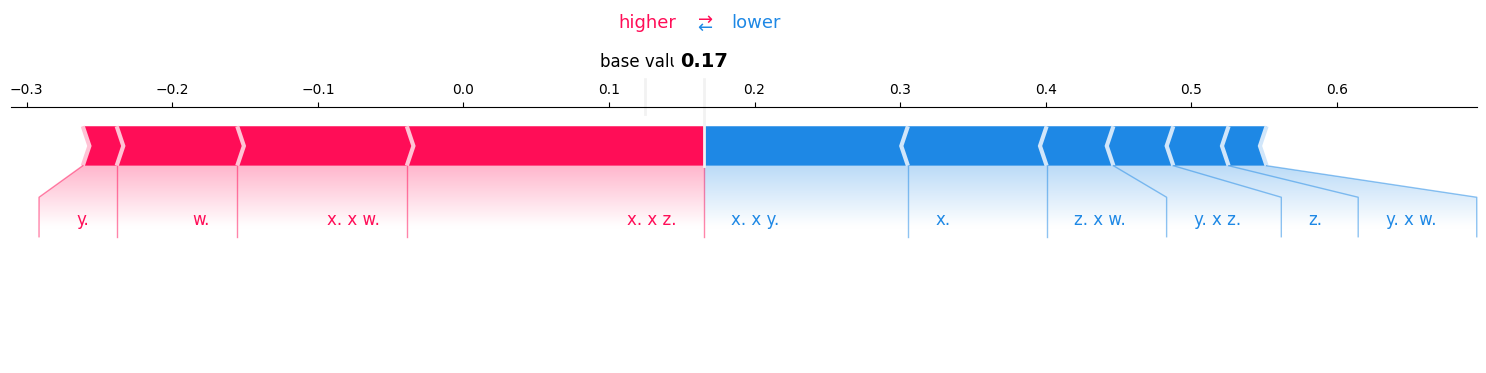

In [24]:
interactions_per_group.plot_force(feature_names=['x', 'y', 'z', 'w'], show=True)


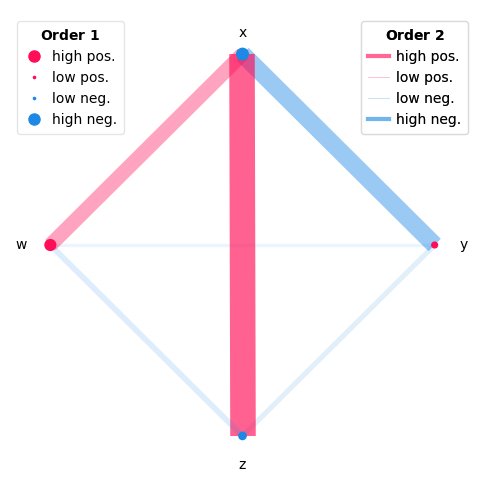

In [25]:
interactions_per_group.plot_network(feature_names=['x', 'y', 'z', 'w'], show=True)

In [26]:
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[20],
    X_train=datasets,  # Assuming the model uses all datasets (or adjust as needed)
    model=classifier,
    regularization=1e-6
)
interactions_per_group.dict_values

[ 0.12499998  0.05892501 -0.0459541  -0.08691527  0.03349735 -0.21615003
  0.05785396 -0.04890753  0.10570448 -0.01701152  0.00749635]


{(): 0.12499997592004228,
 (0,): 0.058925014921685274,
 (1,): -0.04595410231628388,
 (2,): -0.08691526943072296,
 (3,): 0.03349735461062158,
 (0, 1): -0.21615002689556992,
 (0, 2): 0.05785396069552073,
 (0, 3): -0.04890752690978199,
 (1, 2): 0.10570448025380733,
 (1, 3): -0.017011517422822565,
 (2, 3): 0.007496345217370107}

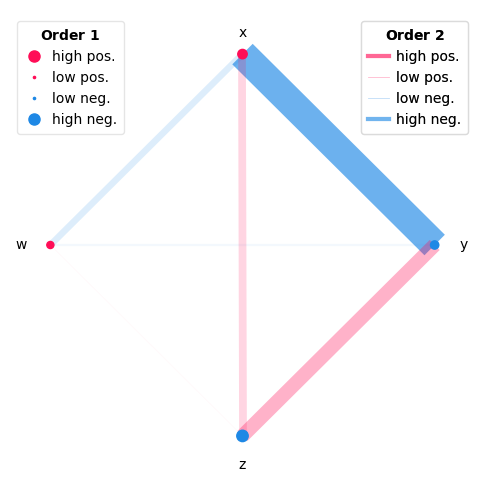

In [27]:
interactions_per_group.plot_network(feature_names=['x', 'y', 'z', 'w'], show=True)


In [30]:
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[11],
    X_train=datasets,  # Assuming the model uses all datasets (or adjust as needed)
    model=classifier,
    regularization=1e-6
)
interactions_per_group.dict_values

[ 0.12499998  0.01827028  0.02198557  0.02158478  0.0214925  -0.02497572
 -0.02436864 -0.02423377 -0.02994388 -0.02980343 -0.02920661]


{(): 0.12499997592004228,
 (0,): 0.018270279979331394,
 (1,): 0.021985567833784993,
 (2,): 0.021584784918512023,
 (3,): 0.02149250117320326,
 (0, 1): -0.024975718629814812,
 (0, 2): -0.02436863595976949,
 (0, 3): -0.024233772448255423,
 (1, 2): -0.029943876239238918,
 (1, 3): -0.029803430102002045,
 (2, 3): -0.029206607830448077}

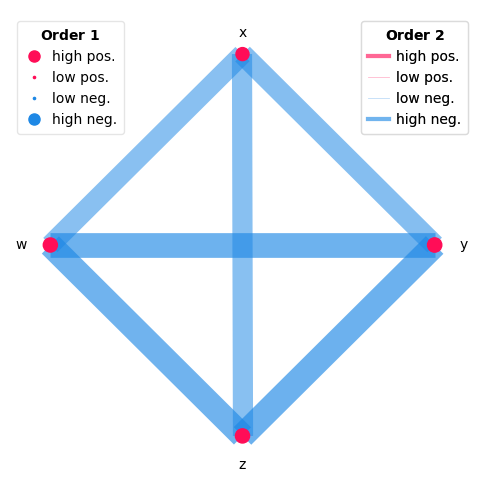

In [31]:
interactions_per_group.plot_network(feature_names=['x', 'y', 'z', 'w'], show=True)


In [32]:
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[7],
    X_train=datasets,  # Assuming the model uses all datasets (or adjust as needed)
    model=classifier,
    regularization=1e-6
)
interactions_per_group.dict_values

[ 0.12499998 -0.00277758 -0.03812455  0.10742453 -0.02837605  0.0062493
 -0.09401649 -0.0351854  -0.09294043  0.06202108 -0.02975397]


{(): 0.12499997592004228,
 (0,): -0.002777576037771753,
 (1,): -0.0381245464063167,
 (2,): 0.10742452505320084,
 (3,): -0.02837605151937428,
 (0, 1): 0.0062492953526805456,
 (0, 2): -0.09401649432661002,
 (0, 3): -0.03518540482084416,
 (1, 2): -0.0929404345119914,
 (1, 3): 0.06202108403416816,
 (2, 3): -0.029753973091756047}

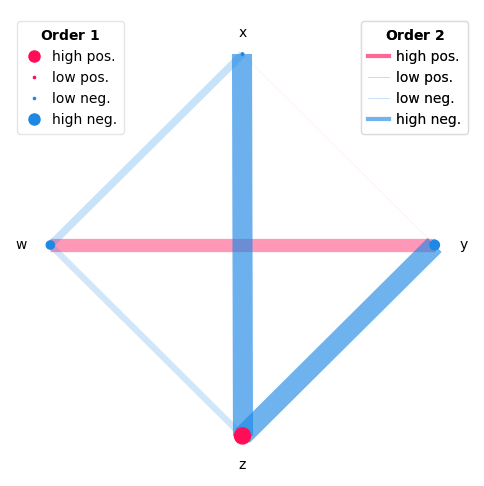

In [33]:
interactions_per_group.plot_network(feature_names=['x', 'y', 'z', 'w'], show=True)


In [40]:
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[0],
    X_train=datasets,  # Assuming the model uses all datasets (or adjust as needed)
    model=classifier,
    regularization=1e-6
)
interactions_per_group.dict_values

[ 7.69230022e-02 -2.24809471e-02 -2.25824726e-02 -1.26756703e-09
 -1.26756698e-09  4.49832790e-02  1.34666974e-11  1.87611194e-09
  1.87611195e-09  1.34666900e-11 -1.91707329e-09]


{(): 0.07692300224699253,
 (0,): -0.022480947101920747,
 (1,): -0.022582472638264125,
 (2,): -1.2675670284445286e-09,
 (3,): -1.2675669780759423e-09,
 (0, 1): 0.04498327900934197,
 (0, 2): 1.3466697402315794e-11,
 (0, 3): 1.876111943213738e-09,
 (1, 2): 1.8761119469390283e-09,
 (1, 3): 1.3466689951735113e-11,
 (2, 3): -1.9170732897351838e-09}

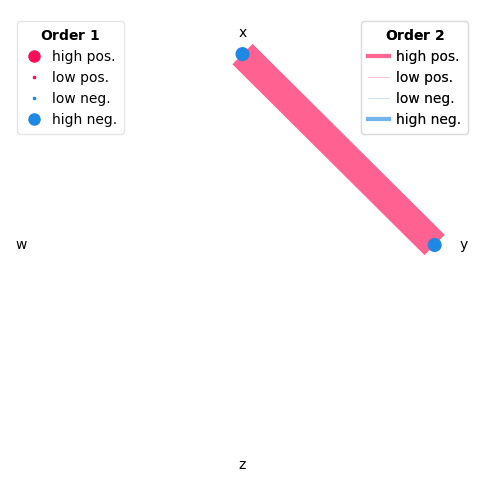

In [41]:
interactions_per_group.plot_network(feature_names=['x', 'y', 'z', 'w'], show=True)


We want xy going negative direction and large

In [47]:
feature_names=['x', 'y']

In [48]:
summary_plot_ocsmm(shapley_values=shapley_values.T.numpy(), feature_names=feature_names, datasets=datasets)


NameError: name 'summary_plot_ocsmm' is not defined

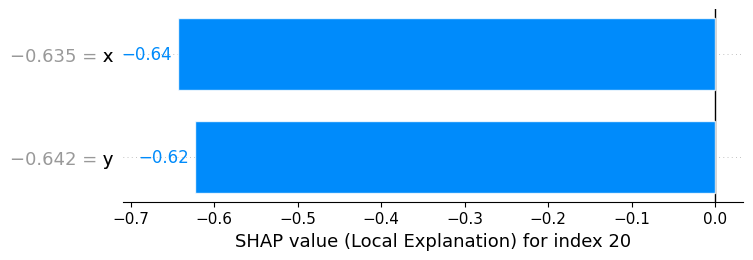

In [82]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 20, feature_names=['x', 'y'], datasets=datasets)

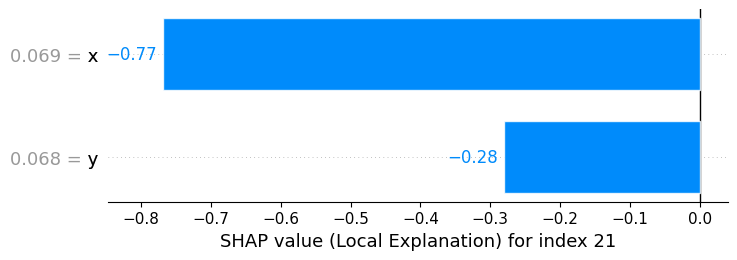

In [83]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 21, feature_names=['x', 'y'], datasets=datasets)

In [84]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 22, feature_names=['x', 'y'], datasets=datasets)

IndexError: index 22 is out of bounds for axis 0 with size 22

In [85]:
interactions = ocsmm_shap.compute_interaction_shapley_values_concise()

In [86]:
interactions

[tensor([[ 0.0000e+00, -1.9994e-08],
         [-1.9994e-08,  0.0000e+00]]),
 tensor([[0.0000e+00, 4.2007e-07],
         [4.2007e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 1.9504e-08],
         [1.9504e-08, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4211e-07],
         [-1.4211e-07,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -2.3222e-07],
         [-2.3222e-07,  0.0000e+00]]),
 tensor([[0.0000e+00, 1.5817e-07],
         [1.5817e-07, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.7729e-08],
         [-6.7729e-08,  0.0000e+00]]),
 tensor([[0.0000e+00, 4.0387e-07],
         [4.0387e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 8.2058e-07],
         [8.2058e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 1.1891e-06],
         [1.1891e-06, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4267e-07],
         [-1.4267e-07,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.7143e-09],
         [-6.7143e-09,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4622e-07],
         [-1.4622e-07,  0.0000e+00]]),
 tensor([[0.0000e+00, 8.5920e-08],
 

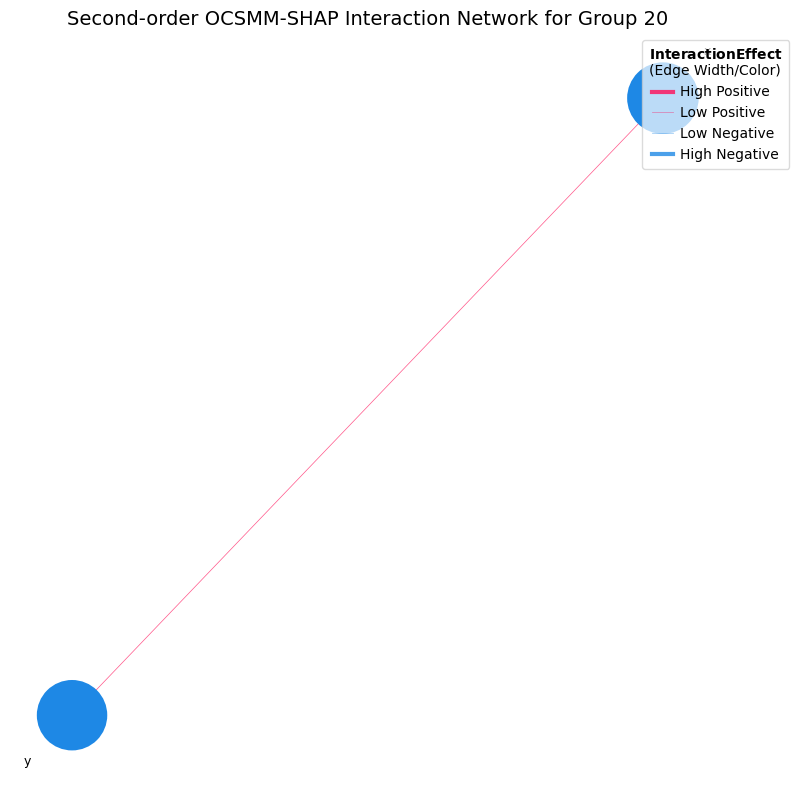

In [87]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network
plot_local_interaction_network(
        phi_1_group=shapley_values.T[20],
        interaction_matrix_group=interactions[20],
        feature_names=['x', 'y'],
        group_id="20"
    )

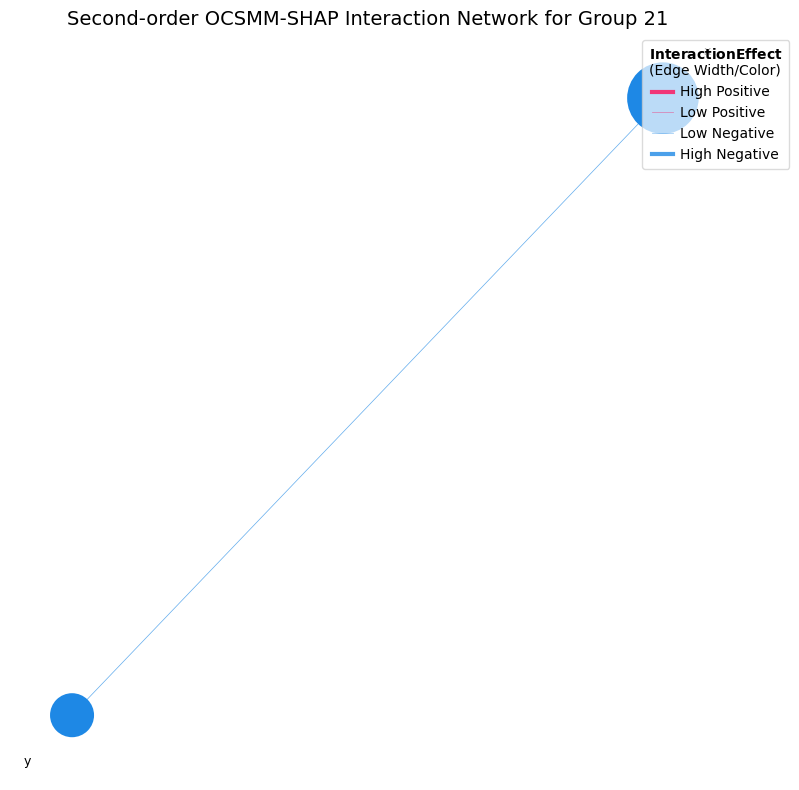

In [88]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[21],
        interaction_matrix_group=interactions[21],
        feature_names=['x', 'y'],
        group_id="21"
    )

In [89]:
max_result = max(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])
min_result = min(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])

In [90]:
min_result

(17, -3.8813911373836163e-07)

In [91]:
max_result

(20, 2.3487953058065614e-06)

In [93]:
interactions

[tensor([[ 0.0000e+00, -1.9994e-08],
         [-1.9994e-08,  0.0000e+00]]),
 tensor([[0.0000e+00, 4.2007e-07],
         [4.2007e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 1.9504e-08],
         [1.9504e-08, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4211e-07],
         [-1.4211e-07,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -2.3222e-07],
         [-2.3222e-07,  0.0000e+00]]),
 tensor([[0.0000e+00, 1.5817e-07],
         [1.5817e-07, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.7729e-08],
         [-6.7729e-08,  0.0000e+00]]),
 tensor([[0.0000e+00, 4.0387e-07],
         [4.0387e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 8.2058e-07],
         [8.2058e-07, 0.0000e+00]]),
 tensor([[0.0000e+00, 1.1891e-06],
         [1.1891e-06, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4267e-07],
         [-1.4267e-07,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.7143e-09],
         [-6.7143e-09,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4622e-07],
         [-1.4622e-07,  0.0000e+00]]),
 tensor([[0.0000e+00, 8.5920e-08],
 

In [94]:
from src.explanation_algorithms.OCSMM_interaction import OCSMMSHAP
ocsmm_exp = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision[0])

In [95]:
ocsmm_exp.fit(datasets, 2**datasets[0].shape[1])

Calculating value functions v(S): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]


OCSMM-SHAP fitting complete.


In [96]:
shapley_dict = ocsmm_exp.compute_shapley_values_dict()

Calculating main effects (phi_1)...
Calculating residuals for interactions...
Calculating interaction effects (phi_2)...
Assembling output dictionaries...
Shapley value dictionary computation complete.


In [97]:
shapley_dict[20]

{(): -0.0008563864976167679,
 (0,): -0.006430657580494881,
 (1,): -0.006228059530258179,
 (0, 1): 2.3464492571179107e-09}

In [98]:
shapley_dict[21]

{(): -0.0008563864976167679,
 (0,): -0.0076872119680047035,
 (1,): -0.0028016252908855677,
 (0, 1): -4.09372605258973e-11}

In [99]:
shapley_dict[22]

IndexError: list index out of range

In [50]:
shapley_dict[:3]

[{(): -0.004118564538657665,
  (0,): -0.0003553209826350212,
  (1,): 0.00040632346644997597,
  (0, 1): -1.700764251655329e-10},
 {(): -0.004118564538657665,
  (0,): 0.002623481908813119,
  (1,): -0.002624422311782837,
  (0, 1): 1.435269347815904e-09},
 {(): -0.004118564538657665,
  (0,): 0.002022417262196541,
  (1,): -0.002013771329075098,
  (0, 1): 9.81910885933246e-10}]

In [39]:
ocsmm_exp.check_efficiency(shapley_dict)


--- Checking SHAP Efficiency (from Dicts) ---
Group 0: Sum(phi_1+phi_2) = 0.000051, Target(vN-vE) = 0.004169, Error = 0.00411839
Group 1: Sum(phi_1+phi_2) = -0.000001, Target(vN-vE) = 0.004119, Error = 0.00412
Group 2: Sum(phi_1+phi_2) = 0.000009, Target(vN-vE) = 0.004128, Error = 0.00411955
Group 3: Sum(phi_1+phi_2) = -0.000000, Target(vN-vE) = 0.004119, Error = 0.00411885
Group 4: Sum(phi_1+phi_2) = -0.000008, Target(vN-vE) = 0.004108, Error = 0.00411547
Group 5: Sum(phi_1+phi_2) = 0.000001, Target(vN-vE) = 0.004121, Error = 0.0041196
Group 6: Sum(phi_1+phi_2) = -0.000000, Target(vN-vE) = 0.004118, Error = 0.0041185
Group 7: Sum(phi_1+phi_2) = -0.000002, Target(vN-vE) = 0.004116, Error = 0.00411813
Group 8: Sum(phi_1+phi_2) = -0.000110, Target(vN-vE) = 0.004009, Error = 0.00411953
Group 9: Sum(phi_1+phi_2) = -0.000104, Target(vN-vE) = 0.004017, Error = 0.00412138
Group 10: Sum(phi_1+phi_2) = 0.000000, Target(vN-vE) = 0.004119, Error = 0.00411846
Group 11: Sum(phi_1+phi_2) = 0.000005

In [ ]:
if not isinstance(shapley_values, torch.Tensor) or not isinstance(shapley_values, torch.Tensor):
     raise TypeError("Inputs must be torch Tensors")
num_features, num_groups = shapley_values.shape

# 1. Calculate target difference v(N) - v(Empty)
target_diff = (shapley_values[-1, :] - shapley_values[0, :]).detach()

# 2. Calculate sum of phi_1 + phi_2 for each group
total_shap_sum = torch.zeros_like(target_diff)
triu_indices = torch.triu_indices(num_features, num_features, offset=1) if num_features >= 2 else None

for k in range(num_groups):
    sum_phi1_k = shapley_values[:, k].detach().sum()
    sum_phi2_k = torch.tensor(0.0, device=shapley_values.device)
    if triu_indices is not None:
         # Ensure matrix is detached and has the correct device
         interaction_matrix_k = interactions[k].detach().to(shapley_values.device)
         sum_phi2_k = interaction_matrix_k[triu_indices[0], triu_indices[1]].sum()
    total_shap_sum[k] = sum_phi1_k + sum_phi2_k

# 3. Calculate and print the efficiency error
efficiency_error = total_shap_sum - target_diff
print("--- SHAP Efficiency Check (Errors) ---")
print(efficiency_error)
print(f"Max Absolute Error: {torch.max(torch.abs(efficiency_error)).item():.6g}")

--- SHAP Efficiency Check (Errors) ---
tensor([-4.7923e-04,  6.4760e-03,  4.5754e-03,  1.0108e-03, -1.4650e-02,
         2.6635e-03,  3.7704e-04, -2.9575e-03, -2.6978e-03,  3.7956e-03,
        -4.9016e-04, -1.7016e-03,  5.8703e-03,  4.7866e-05, -2.3183e-03,
         1.2365e-02,  1.8620e-02, -7.1864e-04,  1.1319e-04,  1.4560e-02,
        -1.1521e-02, -5.3655e-03, -1.2440e-01])
Max Absolute Error: 0.124401


In [ ]:
rotated_indices = [i for i,l in enumerate(generated_labels) if l == 'rotated']

/tmp/ipykernel_173615/874826577.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(cmap)(np.linspace(0, 1, len(interactions)))


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Interaction Strength Across All Groups'}, ylabel='Absolute Interaction Strength'>)

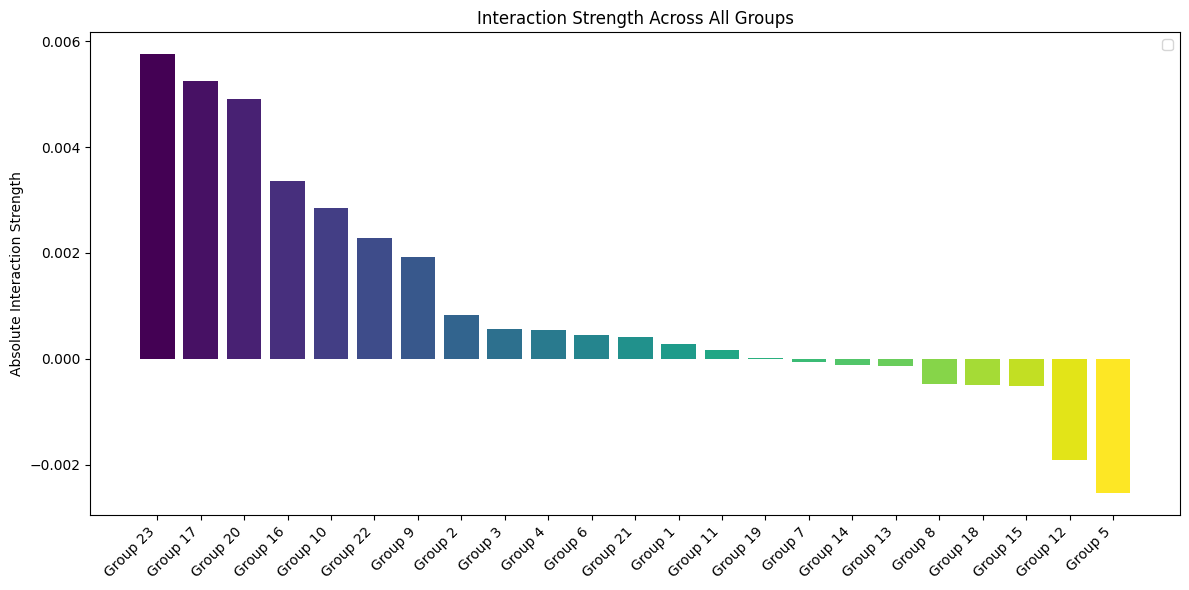

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_interaction_bars(interaction_matrices, group_labels=None, cmap='viridis'):
    """
    Parameters:
    interaction_matrices : List of 2x2 numpy arrays
    group_labels : List of group identifiers (optional)
    cmap : Colormap name (default: 'viridis')
    """
    # Extract absolute off-diagonal values
    interactions = [(mat[0,1]) for mat in interaction_matrices]
    
    # Create group indices if labels not provided
    if group_labels is None:
        group_labels = [f'Group {i+1}' for i in range(len(interactions))]
    
    # Sort by interaction strength
    sort_idx = np.argsort(interactions)[::-1]  # Descending order
    sorted_interactions = [interactions[i] for i in sort_idx]
    sorted_labels = [group_labels[i] for i in sort_idx]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create color map
    colors = cm.get_cmap(cmap)(np.linspace(0, 1, len(interactions)))
    
    # Plot bars
    bars = ax.bar(sorted_labels, sorted_interactions, color=colors)
    
    # # Add horizontal line at median
    # median_val = np.median(sorted_interactions)
    # ax.axhline(median_val, color='red', linestyle='--', 
    #            label=f'Median: {median_val:.2f}')
    
    # Formatting
    ax.set_ylabel('Interaction Strength')
    ax.set_title('Interaction Strength Across All Groups')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    
    return fig, ax

# Example usage:
# interaction_matrices = [...]  # Your list of 2x2 matrices
plot_interaction_bars(interactions)